In [1]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_handling.data_preparation as dp
import source.trading_strategies.trading_strategy as tsh
import source.plot_functions.plots_trading_strategies as plot_ts
uselog= True
data = dp.prepare_data(uselog=uselog)
data = data[data.index >= '1927-01-01']

/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [2]:
model_forecast = pd.read_csv('../../Data/ModelData/oos_predictions.csv', parse_dates=['date'], index_col='date')


In [3]:
df = pd.merge(data, model_forecast, left_index=True, right_index=True, how='left')

In [4]:
df.columns

Index(['price', 'd12', 'e12', 'ret', 'retx', 'AAA', 'BAA', 'lty', 'ltr',
       'corpr',
       ...
       'y_true_chronos2_without_lookahead_2017_future',
       'y_pred_chronos2_without_lookahead_2017_future',
       'y_true_pcr_without_lookahead_ar_2018',
       'y_pred_pcr_without_lookahead_ar_2018',
       'y_true_combination_without_2018', 'y_pred_combination_without_2018',
       'y_true_chronos2_without_lookahead_2018_future',
       'y_pred_chronos2_without_lookahead_2018_future',
       'y_true_tabpfn_without_lookahead_ar_2018',
       'y_pred_tabpfn_without_lookahead_ar_2018'],
      dtype='object', length=113)

In [5]:
bt = tsh.backtest_timing_strategy(df,pred_col = "y_pred_pcr_without_lookahead_ar_2017", gamma=5.0, vol_window=60, uselog= uselog)
summary = tsh.compare_strategies(bt, gamma=5.0)
print("Chronos-2 without lookahead non-log strategy backtest summary:")
print(summary)


Chronos-2 without lookahead non-log strategy backtest summary:
          TotalReturn      CAGR    AnnVol    Sharpe  MaxDrawdown       CEV  \
Strategy                                                                     
Model        0.938935  0.086289  0.088526  0.744579    -0.116976  0.067328   
HA           1.548357  0.124042  0.145558  0.737847    -0.209900  0.075352   
W50          0.950601  0.087104  0.080311  0.827048    -0.119424  0.070912   
W100         2.056227  0.149869  0.160456  0.827048    -0.236705  0.089033   

          Δu vs HA  Δu vs 50%  Δu vs 100%  
Strategy                                   
Model    -0.008024  -0.003584   -0.021705  
HA             NaN        NaN         NaN  
W50            NaN        NaN         NaN  
W100           NaN        NaN         NaN  


In [16]:
#loop over all columns containing "y_pred" and backtest each strategy
for col in df.columns:
    if ("2018" in col) and ("y_pred" in col):
        print(f"Backtesting strategy for {col}")
        bt = tsh.backtest_timing_strategy(df,pred_col = col, gamma=5.0, vol_window=60, uselog= uselog, lag = 1)
        summary = tsh.compare_strategies(bt, gamma=5.0)
        print(summary)
        
        print("\n")

Backtesting strategy for y_pred_pcr_without_lookahead_ar_2018
          TotalReturn      CAGR    AnnVol    Sharpe  MaxDrawdown       CEV  \
Strategy                                                                     
Model        0.502008  0.060579  0.079810  0.494610    -0.109934  0.046243   
HA           0.751248  0.084383  0.150845  0.465790    -0.209900  0.036039   
W50          0.707645  0.080438  0.085610  0.686593    -0.119424  0.062961   
W100         1.367908  0.132726  0.170968  0.686593    -0.236705  0.066880   

          Δu vs HA  Δu vs 50%  Δu vs 100%  
Strategy                                   
Model     0.010204  -0.016718   -0.020637  
HA             NaN        NaN         NaN  
W50            NaN        NaN         NaN  
W100           NaN        NaN         NaN  


Backtesting strategy for y_pred_combination_without_2018
          TotalReturn      CAGR    AnnVol    Sharpe  MaxDrawdown       CEV  \
Strategy                                                            

In [20]:
for i in model_pred_cols.keys():
    col = model_pred_cols[i]
    print(f"Backtesting strategy for {col}")
    bt = tsh.backtest_timing_strategy(df,pred_col = col, gamma=5.0, vol_window=60, uselog= uselog, lag = 1)
    summary = tsh.compare_strategies(bt, gamma=5.0)
    print(summary)
    
    print("\n")

Backtesting strategy for y_pred_pcr_without_lookahead_ar
          TotalReturn      CAGR    AnnVol    Sharpe  MaxDrawdown       CEV  \
Strategy                                                                     
Model       89.207848  0.078035  0.084110  0.417357    -0.378384  0.061258   
HA         117.161305  0.082902  0.135436  0.334518    -0.596701  0.043444   
W50         86.461264  0.077478  0.075467  0.446976    -0.278997  0.063466   
W100       390.744623  0.104783  0.150811  0.446976    -0.502159  0.054647   

          Δu vs HA  Δu vs 50%  Δu vs 100%  
Strategy                                   
Model     0.017814  -0.002208     0.00661  
HA             NaN        NaN         NaN  
W50            NaN        NaN         NaN  
W100           NaN        NaN         NaN  


Backtesting strategy for y_pred_combination_completed
          TotalReturn      CAGR    AnnVol    Sharpe  MaxDrawdown       CEV  \
Strategy                                                                    

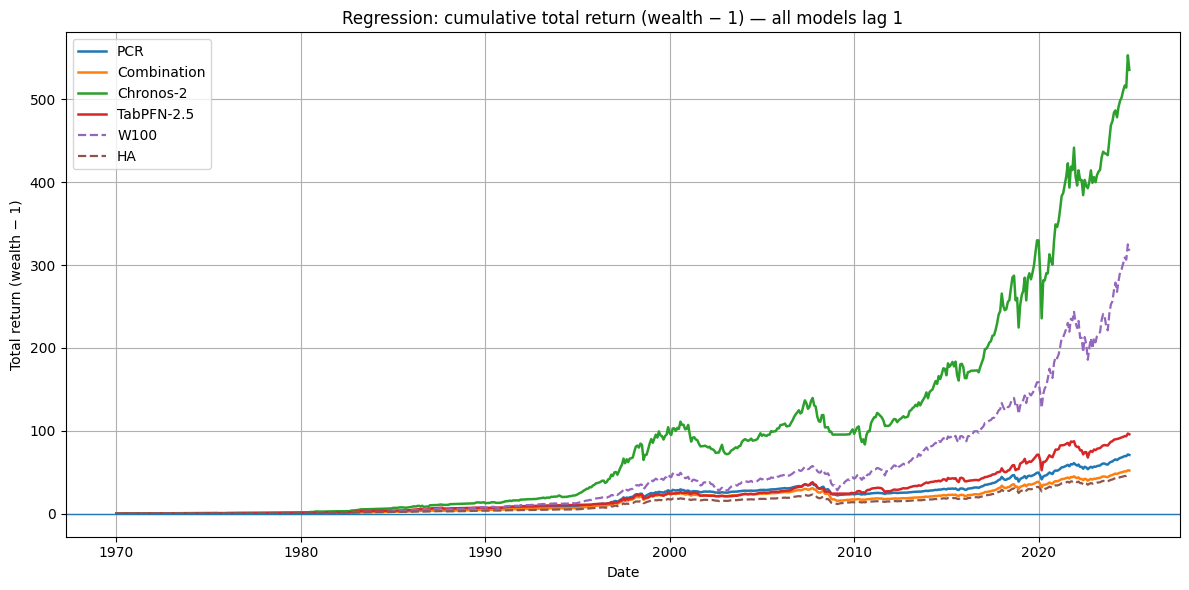

In [18]:
model_pred_cols = {
    "PCR": "y_pred_pcr_without_lookahead_ar",
    "Combination": "y_pred_combination_completed",
    "Chronos-2": "y_pred_chronos2_without_lookahead",
    "TabPFN-2.5": "y_pred_tabpfn_without_lookahead_ar",
}

plot_ts.plot_regression_timing_total_return_models(
    df[df.index >= "1965-01-01"],
    model_pred_cols=model_pred_cols,
    target_col="equity_premium",
    rf_col="Rfree",
    uselog=uselog,
    gamma=5.0,
    vol_window=60,
    baselines=["HA","100"],   # choose any subset
    title="Regression: cumulative total return (wealth − 1) — all models lag 1",
    lag =1
)
